# Imitation of statistics for an article

In this notebook, we reproduce the main statistics of the following article : https://doi.org/10.1158/1078-0432.CCR-20-1163 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the dataset and preprocessing

### Reading

The dataset of this article used in this notebook is the ```Supplemental-table1.xlsx``` file.

In [2]:
df = pd.read_excel('data/Supplemental-table1.xlsx')
df

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,Alive_0,Time to progression (days),Progression_1,Clinical benefit,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Lymph related
0,14891,EGAD00001001961,LUNG,F,8,Nivolumab,Naive,Progression,Mixed,45,...,1,179,1,NCB,0.351869,11.095310,23.0729,4.1689,55.51575,Non-lymph related
1,18624,EGAD00001002047,AECA,F,10,Nivolumab,Naive,Progression,Stable disease,47,...,1,148,1,NCB,0.071464,3.876336,5.4552,0.7910,9.32352,Non-lymph related
2,21392,EGAD00001002544,OV,F,6,Monalizumab,Naive,Progression,Physician assessed SD,57,...,1,79,1,NCB,0.040394,2.415688,4.1274,4.0377,50.12008,Lymph related
3,21516,EGAD00001002546,SKCM,F,3,Ipilimumab,Naive,Death,Not evaluable,29,...,1,11,0,NCB,0.052774,6.235845,11.4871,0.6006,1.58550,Non-lymph related
4,22186,EGAD00001001966,LUNG,F,4,Atezolizumab,Naive,Progression,Stable disease,52,...,1,80,1,NCB,0.009323,4.606660,7.1503,1.8234,38.42695,Non-lymph related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,39344,EGAD00001005839,UVM,F,1,Pembrolizumab,Treated,Ongoing,Physician assessed SD,64,...,0,232,1,DCB,0.011178,1.516827,1.5457,0.4231,12.48693,Non-lymph related
94,37899,EGAD00001005838,CHOL,F,2,Nivolumab,Naive,Death,Physician assessed PR,38,...,1,96,0,NCB,0.818233,2.247151,2.7416,11.2704,47.97376,Non-lymph related
95,37775,EGAD00001004934,HNSC,M,1,Avelumab/OX40 agonist PF-04518600,Naive,Progression,Stable disease,69,...,1,69,1,NCB,0.018982,3.848247,5.8036,8.7136,5.13403,Non-lymph related
96,38313,EGAD00001005844,ACC,F,3,Avelumab/Debio1143 (SMAC mimetic),Naive,Toxicity,Partial response,34,...,1,51,1,NCB,0.000000,5.617878,7.7940,0.0688,0.51364,Non-lymph related


### Delete non-naive patients
In the article, the authors only focus on naive patients, so we drop the non-naive patients.

In [3]:
df = df[df["Cohort"] == 'Naive']
df

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,Alive_0,Time to progression (days),Progression_1,Clinical benefit,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Lymph related
0,14891,EGAD00001001961,LUNG,F,8,Nivolumab,Naive,Progression,Mixed,45,...,1,179,1,NCB,0.351869,11.095310,23.0729,4.1689,55.51575,Non-lymph related
1,18624,EGAD00001002047,AECA,F,10,Nivolumab,Naive,Progression,Stable disease,47,...,1,148,1,NCB,0.071464,3.876336,5.4552,0.7910,9.32352,Non-lymph related
2,21392,EGAD00001002544,OV,F,6,Monalizumab,Naive,Progression,Physician assessed SD,57,...,1,79,1,NCB,0.040394,2.415688,4.1274,4.0377,50.12008,Lymph related
3,21516,EGAD00001002546,SKCM,F,3,Ipilimumab,Naive,Death,Not evaluable,29,...,1,11,0,NCB,0.052774,6.235845,11.4871,0.6006,1.58550,Non-lymph related
4,22186,EGAD00001001966,LUNG,F,4,Atezolizumab,Naive,Progression,Stable disease,52,...,1,80,1,NCB,0.009323,4.606660,7.1503,1.8234,38.42695,Non-lymph related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,39280,EGAD00001004933,LUNG,M,2,Pembrolizumab,Naive,Toxicity,Physician Assessed SD,60,...,1,401,0,DCB,0.695396,84.998501,96.4079,8.4768,86.62561,Non-lymph related
94,37899,EGAD00001005838,CHOL,F,2,Nivolumab,Naive,Death,Physician assessed PR,38,...,1,96,0,NCB,0.818233,2.247151,2.7416,11.2704,47.97376,Non-lymph related
95,37775,EGAD00001004934,HNSC,M,1,Avelumab/OX40 agonist PF-04518600,Naive,Progression,Stable disease,69,...,1,69,1,NCB,0.018982,3.848247,5.8036,8.7136,5.13403,Non-lymph related
96,38313,EGAD00001005844,ACC,F,3,Avelumab/Debio1143 (SMAC mimetic),Naive,Toxicity,Partial response,34,...,1,51,1,NCB,0.000000,5.617878,7.7940,0.0688,0.51364,Non-lymph related


### Select pertinent columns
For this notebook and the statistics, we need the following columns :
- The scores of the biomarkers : ```CD8+ T cell score```, ```Exome mut per mb```, ```Genome mut per mb```, ```CD274 expression```, and ```M1M2 expression```.
- The columns which indicates if the patient had a response or not : ```Clinical benefit```.
- The survival measures : ```Overall survival (days)``` and ```Time to progression (days)```.
- The event status (for surviving) : ```Alive_0``` and ```Progression_1```.

So let's select them.

In [4]:
df = df.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression","Clinical benefit","Overall survival (days)","Time to progression (days)","Alive_0","Progression_1"]]
df

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.0729,4.1689,55.51575,NCB,391,179,1,1
1,0.071464,3.876336,5.4552,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.1274,4.0377,50.12008,NCB,408,79,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
4,0.009323,4.606660,7.1503,1.8234,38.42695,NCB,385,80,1,1
...,...,...,...,...,...,...,...,...,...,...
92,0.695396,84.998501,96.4079,8.4768,86.62561,DCB,401,401,1,0
94,0.818233,2.247151,2.7416,11.2704,47.97376,NCB,96,96,1,0
95,0.018982,3.848247,5.8036,8.7136,5.13403,NCB,441,69,1,1
96,0.000000,5.617878,7.7940,0.0688,0.51364,NCB,158,51,1,1


## Distribution study of biomarkers for DCB group and NCB group

In this section, we study, for each biomarker of this article, the distribution of their values for the group DCB (responders) et NCB (non responders). The results are boxplots.

In [5]:
from survivalAnalysis.BiomarkerDistribution import BiomarkerDistribution

plotter = BiomarkerDistribution()

### Splitting the dataframe into DCB group and NCB group

In [6]:
dcb_group = df.loc[df["Clinical benefit"] == "DCB"]
ncb_group = df.loc[df["Clinical benefit"] == "NCB"]
display(dcb_group)
display(ncb_group)

,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
10,0.202788,80.953628,107.1840,1.7444,19.27326,DCB,184,184,0,0
12,0.262311,1.404470,2.7140,3.1427,467.93886,DCB,309,222,1,1
13,0.060953,17.612049,33.6950,0.2410,5.25660,DCB,578,578,0,0
17,0.680930,0.926950,1.3296,27.3710,98.38025,DCB,756,756,0,0
19,0.139384,16.348026,16.0194,25.7392,23.19457,DCB,462,204,1,1
23,0.173110,1.095486,1.0423,1.1816,14.09756,DCB,699,557,0,1
24,0.126651,6.853812,9.3941,3.0892,36.90372,DCB,1100,214,1,1
25,0.054904,12.724495,23.2112,1.1874,7.55635,DCB,444,188,1,1
27,0.012850,2.668492,4.4817,0.8840,3.77268,DCB,407,290,1,1
39,0.010180,23.875983,40.1297,0.3657,1.39105,DCB,714,535,0,1


,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Clinical benefit,Overall survival (days),Time to progression (days),Alive_0,Progression_1
0,0.351869,11.095310,23.0729,4.1689,55.51575,NCB,391,179,1,1
1,0.071464,3.876336,5.4552,0.7910,9.32352,NCB,544,148,1,1
2,0.040394,2.415688,4.1274,4.0377,50.12008,NCB,408,79,1,1
3,0.052774,6.235845,11.4871,0.6006,1.58550,NCB,11,11,1,0
4,0.009323,4.606660,7.1503,1.8234,38.42695,NCB,385,80,1,1
...,...,...,...,...,...,...,...,...,...,...
89,0.008531,19.887290,29.7956,0.8520,3.56523,NCB,467,141,1,1
94,0.818233,2.247151,2.7416,11.2704,47.97376,NCB,96,96,1,0
95,0.018982,3.848247,5.8036,8.7136,5.13403,NCB,441,69,1,1
96,0.000000,5.617878,7.7940,0.0688,0.51364,NCB,158,51,1,1


### TMB biomarker

#### Exome analysis

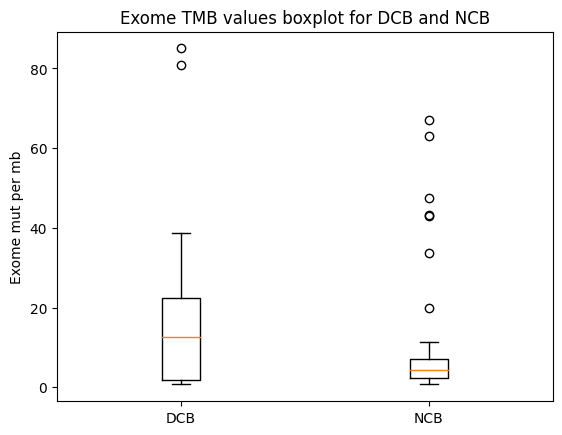

In [10]:
plotter.boxplot_values(dcb_group["Exome mut per mb"], ncb_group["Exome mut per mb"],"DCB","NCB","Exome mut per mb","Exome TMB values boxplot for DCB and NCB","figures/boxplot-tmb-exome.png")

#### Genome analysis

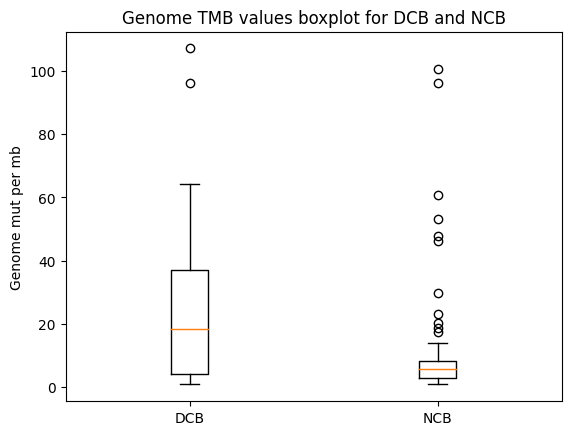

In [11]:
plotter.boxplot_values(dcb_group["Genome mut per mb"], ncb_group["Genome mut per mb"],"DCB","NCB","Genome mut per mb","Genome TMB values boxplot for DCB and NCB","figures/boxplot-tmb-genome.png")

### CD8+ T cell score

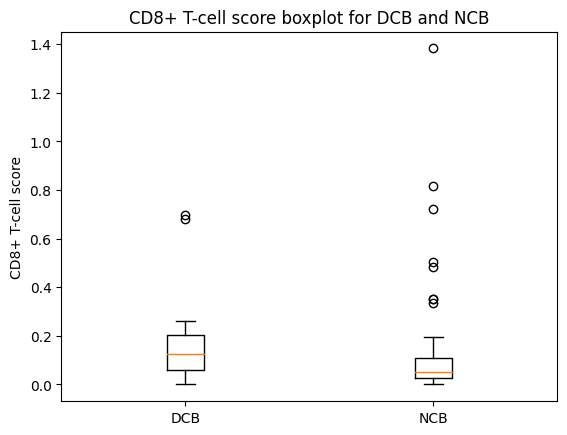

In [12]:
plotter.boxplot_values(dcb_group["CD8+ T cell score"], ncb_group["CD8+ T cell score"],"DCB","NCB","CD8+ T-cell score","CD8+ T-cell score boxplot for DCB and NCB","figures/boxplot-cd8score.png")

### M1-M2 macrophage score

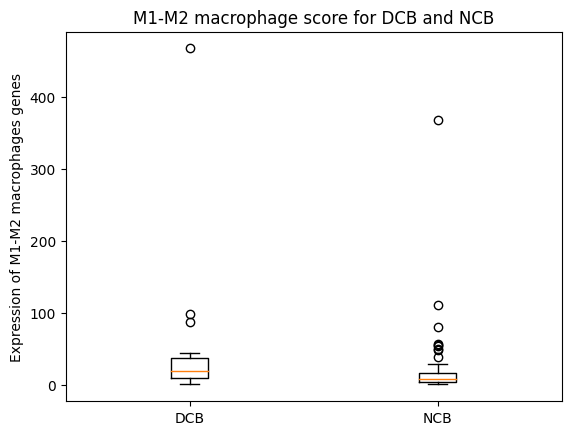

In [13]:
plotter.boxplot_values(dcb_group["M1M2 expression"], ncb_group["M1M2 expression"],"DCB","NCB","Expression of M1-M2 macrophages genes","M1-M2 macrophage score for DCB and NCB","figures/boxplot-m1m2score.png")

### CD274 expression score

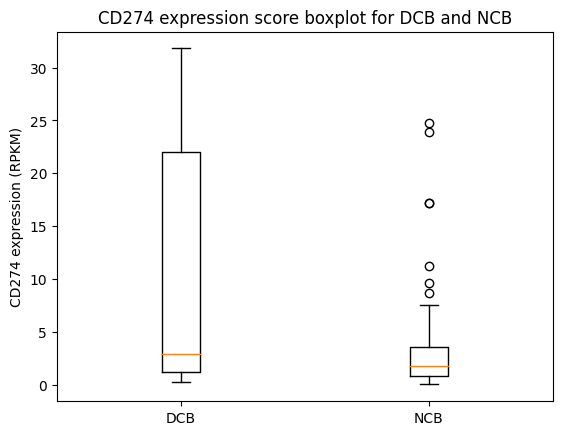

In [14]:
plotter.boxplot_values(dcb_group["CD274 expression"], ncb_group["CD274 expression"],"DCB","NCB","CD274 expression (RPKM)","CD274 expression score boxplot for DCB and NCB","figures/boxplot-cd274score.png")